# Data Preprocessing

# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:

#categorical columns
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
len(df.select_dtypes(include='object').columns)

4

In [9]:
#numerical columns
df.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [10]:
len(df.select_dtypes(include=['int64','float64']).columns)

5

In [11]:
#statistical summary
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Dealing with missing values

In [12]:
df.isnull().values.any()

False

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Restructure the dataset

In [14]:
#Add a column to find age
df['current_year']=2022
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [15]:
df['Years_old']=df['current_year']-df['Year']

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,Years_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [17]:
#Dropping not required column
df=df.drop(['Car_Name','Year','current_year'],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Encoding categorical data

In [18]:
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [19]:
print(df['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [20]:
print(df['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [21]:
print(df['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [22]:
df.shape

(301, 8)

In [23]:
df=pd.get_dummies(df,drop_first=True)
df.head()
#manual coding
#df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
#or  #df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [24]:
df.shape

(301, 9)

# Correlation matrix

<AxesSubplot:title={'center':'correlation with selling_price'}>

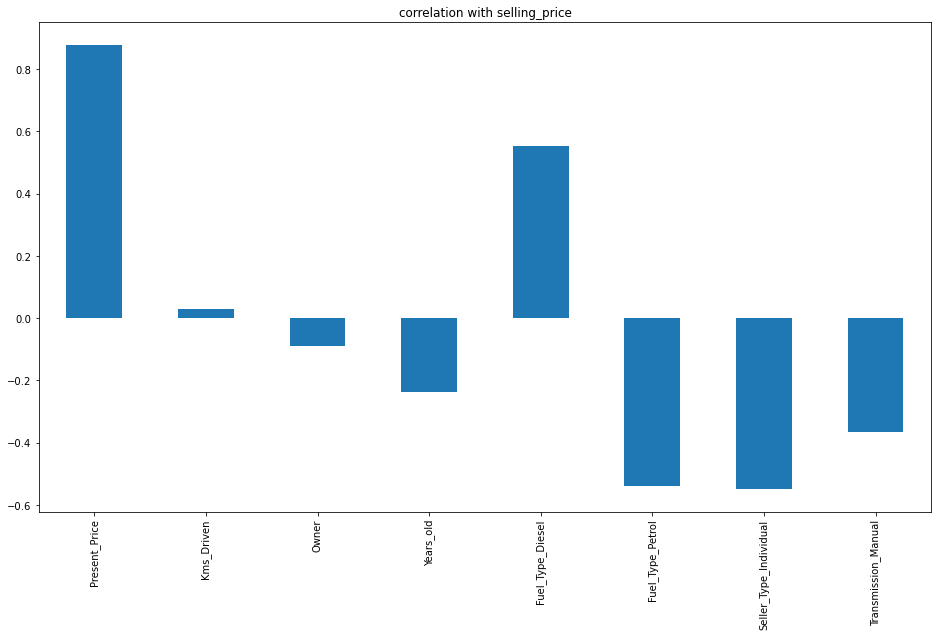

In [25]:
df1=df.drop(columns='Selling_Price')
df1.corrwith(df['Selling_Price']).plot.bar(figsize=(16,9),title='correlation with selling_price')

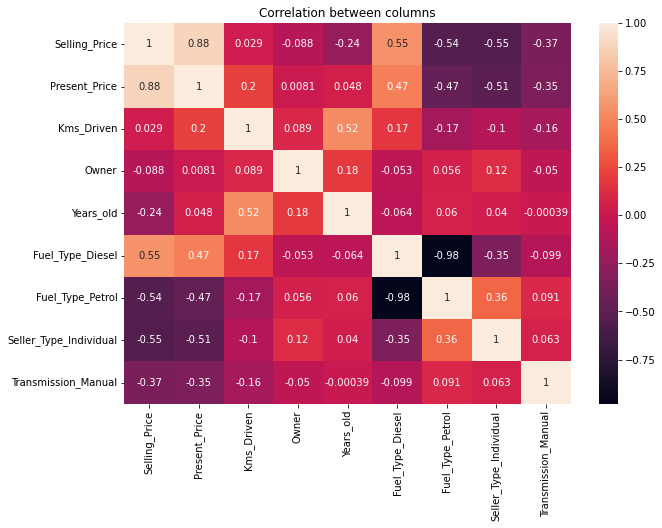

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between columns')
plt.show()

In [27]:
#lighter value indicates high value of correlation whereas dark values represent low value of correlation


<AxesSubplot:title={'center':'correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

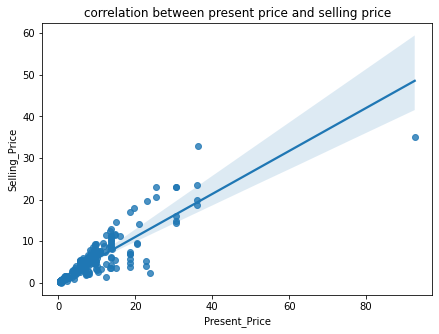

In [28]:
fig=plt.figure(figsize=(7,5))
plt.title('correlation between present price and selling price')
sns.regplot(x='Present_Price',y='Selling_Price',data=df)

# Splitting the dataset

In [29]:
x=df.drop(['Selling_Price'],axis=1)
#independent variable

In [30]:
y=df['Selling_Price']
#target variable

In [31]:
x.shape


(301, 8)

In [32]:
y.shape

(301,)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape

(240, 8)

In [35]:
x_test.shape

(61, 8)

In [36]:
y_train.shape

(240,)

In [37]:
y_test.shape

(61,)

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Building the model

# 1) Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()
#instance of class

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
prediction=model.predict(x_test)

In [43]:
#now we will calculate mean absolute error,mean squared error and R2 to see
#how good our model is

In [44]:
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)

print(mse)
print(rmse)

2.1628715277876043
1.4706704347975463


In [46]:

r2_score(y_test,prediction)

0.9144342972228514

In [47]:
#mse and mae are used to predict how close our value is to the actual value
#r2 score is used to check how good our model is

Text(0, 0.5, 'actual value')

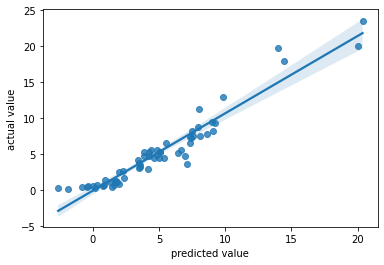

In [48]:
sns.regplot(x=prediction,y=y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')

# 2) Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)


RandomForestRegressor()

In [50]:
prediction=reg.predict(x_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)

print(mse)
print(rmse)

1.0368886962295072
1.0182773179392277


In [53]:
r2_score(y_test,prediction)  

0.9589794822047

Text(0, 0.5, 'actual value')

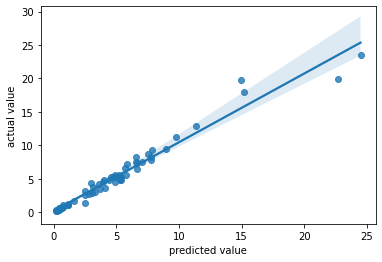

In [54]:
sns.regplot(x=prediction,y=y_test)
plt.xlabel('predicted value')
plt.ylabel('actual value')

# Finding optimal parameter using RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
parameters={'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
           'criterion':['mse','mae'],
           'max_depth':[10,20,30,40,50],
           'min_samples_split':[2,5,10,20,50],
           'min_samples_leaf':[1,2,5,10],
           'max_features':['auto','sqrt','log2']
           }

In [57]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [58]:
random_cv=RandomizedSearchCV(estimator=reg,param_distributions=parameters,n_iter=10,
                            scoring='neg_mean_absolute_error',cv=5,verbose=2,n_jobs=1)

In [59]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=   1.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   1.4s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.6s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.9s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   2.0s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.2s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.4s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END criterion=mae, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.8s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.4s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END criterion=mse, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=50, n_estimators=300; total time=   0.5s


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [60]:
random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'mae'}

In [61]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, n_estimators=600)

# Final Model Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg2=RandomForestRegressor(criterion='mae', max_depth=30, 
                       n_estimators=600)
reg2.fit(x_train,y_train)


C:\Users\victor\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', max_depth=30, n_estimators=600)

In [75]:
prediction=reg2.predict(x_test)

In [76]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)

print(mse)
print(rmse)
r2_score(y_test,prediction)

0.9311794719524269
0.9649764100497105


0.9631614615544156